# Industry 4.0 의 중심, BigData

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, [김진수](bigpycraft@gmail.com)</font></div>
<hr>

## <font color='brown'> 공공데이터 활용 </font>

### Case2. 2015범죄 발생 유형별 분석
>  
- [범죄통계] 범죄발생지 (지역별)
- http://www.data.go.kr/dataset/3074462/fileData.do;jsessionid=wIXUEwb7u5qgTUblcWd1qSq-.node20

In [1]:
import platform

from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

%matplotlib inline
plt.rcParams["figure.figsize"] = [12,6]

In [2]:
df = pd.read_csv('data/public_2015_crime_st.csv', encoding='EUC-KR')
df.head()

,범죄대분류,범죄중분류,계,서울,부산,대구,인천,광주,대전,울산,...,경남 밀양,경남 사천,경남 양산,경남 진주,경남 창원,경남 통영,제주 서귀포,제주 제주,기타도시,도시이외
0,강력범죄,살인기수,356,46,29,17,20,9,16,7,...,2,-,3,2,3,-,-,4,2,51
1,강력범죄,살인미수등,558,100,43,12,28,8,9,15,...,-,3,1,3,15,3,1,11,2,49
2,강력범죄,강도,"1,149",260,137,51,88,47,35,33,...,4,1,7,6,26,1,1,24,1,46
3,강력범죄,강간,"5,155","1,129",314,197,347,170,171,112,...,8,5,31,32,68,15,16,68,11,366
4,강력범죄,유사강간,583,123,28,37,47,21,14,16,...,-,2,4,1,7,1,3,13,-,33


In [3]:
df['범죄대분류']

0       강력범죄
1       강력범죄
2       강력범죄
3       강력범죄
4       강력범죄
5       강력범죄
6       강력범죄
7       강력범죄
8       절도범죄
9       폭력범죄
10      폭력범죄
11      폭력범죄
12      폭력범죄
13      폭력범죄
14      폭력범죄
15      폭력범죄
16      폭력범죄
17      지능범죄
18      지능범죄
19      지능범죄
20      지능범죄
21      지능범죄
22      지능범죄
23      지능범죄
24      지능범죄
25      지능범죄
26      풍속범죄
27      풍속범죄
28    특별경제범죄
29      마약범죄
30      보건범죄
31      환경범죄
32      교통범죄
33      노동범죄
34      안보범죄
35      선거범죄
36      병역범죄
37      기타범죄
Name: 범죄대분류, dtype: object

In [4]:
df['범죄중분류']

0             살인기수
1            살인미수등
2               강도
3               강간
4             유사강간
5             강제추행
6     기타 강간  강제추행등
7               방화
8             절도범죄
9               상해
10              폭행
11          체포  감금
12              협박
13          약취  유인
14           폭력행위등
15              공갈
16              손괴
17            직무유기
18            직권남용
19             증수뢰
20              통화
21          문서  인장
22          유가증권인지
23              사기
24              횡령
25              배임
26           성풍속범죄
27            도박범죄
28          특별경제범죄
29            마약범죄
30            보건범죄
31            환경범죄
32            교통범죄
33            노동범죄
34            안보범죄
35            선거범죄
36            병역범죄
37            기타범죄
Name: 범죄중분류, dtype: object

#### <font color='blue'> # 범죄중분류 별 건수 </font>

In [5]:
df_index = pd.Series(df['계'].values, index=df['범죄중분류'].values)
df_index

살인기수                356
살인미수등               558
강도                1,149
강간                5,155
유사강간                583
강제추행             16,054
기타 강간  강제추행등        408
방화                1,502
절도범죄            203,037
상해               50,028
폭행              165,803
체포  감금            1,318
협박               15,870
약취  유인              201
폭력행위등            13,302
공갈                3,745
손괴               59,127
직무유기                531
직권남용                437
증수뢰                 260
통화                1,811
문서  인장           13,295
유가증권인지              219
사기              241,613
횡령               50,053
배임                4,358
성풍속범죄            12,719
도박범죄             13,446
특별경제범죄           65,025
마약범죄              7,329
보건범죄             14,662
환경범죄              4,349
교통범죄            600,401
노동범죄              2,457
안보범죄                 81
선거범죄              1,018
병역범죄             16,651
기타범죄            260,539
dtype: object

In [6]:
df_index.values

array(['356', '558', '1,149', '5,155', '583', '16,054', '408', '1,502',
       '203,037', '50,028', '165,803', '1,318', '15,870', '201', '13,302',
       '3,745', '59,127', '531', '437', '260', '1,811', '13,295', '219',
       '241,613', '50,053', '4,358', '12,719', '13,446', '65,025',
       '7,329', '14,662', '4,349', '600,401', '2,457', '81', '1,018',
       '16,651', '260,539'], dtype=object)

<font color='green'> 
> [Note] 
* 값안에 콤마(,)가 있다는 의미는 숫자가 아니라 문자란 말이다. 
* 따라서 그대로 하면 연산이 안된다. 변환이 필요하다.

In [7]:
df_index.values[2]

'1,149'

In [8]:
int(df_index.values[2].replace(',', ''))

1149

#### <font color='blue'> # 문자열을 정수형으로 변환 </font>

In [9]:
for n in np.arange(len(df_index)):
    df_index.values[n] = int(df_index.values[n].replace(',', ''))

In [10]:
df_index.values

array([356, 558, 1149, 5155, 583, 16054, 408, 1502, 203037, 50028, 165803,
       1318, 15870, 201, 13302, 3745, 59127, 531, 437, 260, 1811, 13295,
       219, 241613, 50053, 4358, 12719, 13446, 65025, 7329, 14662, 4349,
       600401, 2457, 81, 1018, 16651, 260539], dtype=object)

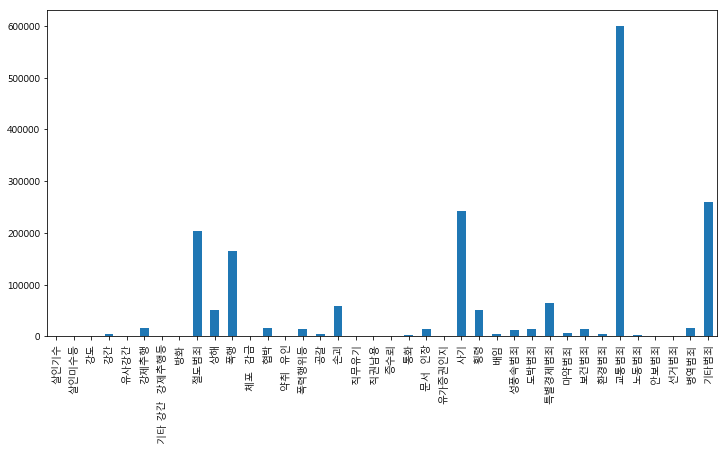

In [11]:
df_index.plot(kind='bar')

In [12]:
plt.rcParams["figure.figsize"] = [14,10]


#### <font color='blue'> # 범죄대분류 별 건수 </font>

In [13]:
df_crime = pd.Series(df['계'].values, index=df['범죄대분류'].values)
df_crime

강력범죄         356
강력범죄         558
강력범죄        1149
강력범죄        5155
강력범죄         583
강력범죄       16054
강력범죄         408
강력범죄        1502
절도범죄      203037
폭력범죄       50028
폭력범죄      165803
폭력범죄        1318
폭력범죄       15870
폭력범죄         201
폭력범죄       13302
폭력범죄        3745
폭력범죄       59127
지능범죄         531
지능범죄         437
지능범죄         260
지능범죄        1811
지능범죄       13295
지능범죄         219
지능범죄      241613
지능범죄       50053
지능범죄        4358
풍속범죄       12719
풍속범죄       13446
특별경제범죄     65025
마약범죄        7329
보건범죄       14662
환경범죄        4349
교통범죄      600401
노동범죄        2457
안보범죄          81
선거범죄        1018
병역범죄       16651
기타범죄      260539
dtype: object

In [14]:
def get_crime_cnt(d_frame):
    crime_cnt = {}
    for idx in range(len(d_frame.index)):
        # print(idx, d_frame.index[idx], d_frame[idx], end="  \t =>")
        # print(idx, crime_cnt)

        crime = d_frame.index[idx]
        count  = d_frame[idx]

        if crime_cnt.get(crime):
            crime_cnt[crime] += count
        else:
            crime_cnt[crime] = count
    
    return crime_cnt
    
crime_dict = get_crime_cnt(df_crime)
crime_dict

{'강력범죄': 25765,
 '교통범죄': 600401,
 '기타범죄': 260539,
 '노동범죄': 2457,
 '마약범죄': 7329,
 '병역범죄': 16651,
 '보건범죄': 14662,
 '선거범죄': 1018,
 '안보범죄': 81,
 '절도범죄': 203037,
 '지능범죄': 312577,
 '특별경제범죄': 65025,
 '폭력범죄': 309394,
 '풍속범죄': 26165,
 '환경범죄': 4349}

In [15]:
crime_stat = Series(crime_dict)
crime_stat.name = "범죄발생수"
crime_stat

강력범죄       25765
교통범죄      600401
기타범죄      260539
노동범죄        2457
마약범죄        7329
병역범죄       16651
보건범죄       14662
선거범죄        1018
안보범죄          81
절도범죄      203037
지능범죄      312577
특별경제범죄     65025
폭력범죄      309394
풍속범죄       26165
환경범죄        4349
Name: 범죄발생수, dtype: int64

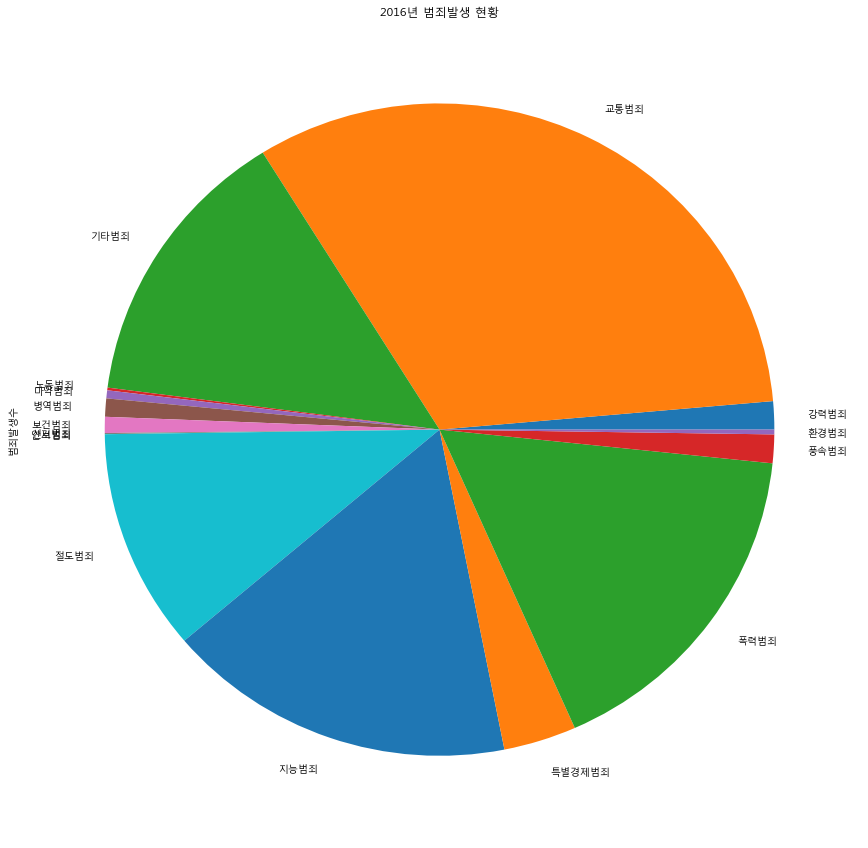

In [16]:
plt.rcParams["figure.figsize"] = [15,15]
# crime_stat.plot(kind='pie');
crime_stat.plot(kind='pie', title='2016년 범죄발생 현황');

#### <font color='blue'> # Seaborn을 사용한 데이터 시각화 </font>
> 
- Matplotlib을 기반으로 다양한 색상 테마와 통계용 챠트 등의 기능을 추가한 시각화 패키지 
- http://seaborn.pydata.org/index.html

In [17]:
import seaborn as sns
sns.set()

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [18]:
# df_index.sort_values().head(10)
df_index.sort_values(ascending=False).head(10)

교통범죄      600401
기타범죄      260539
사기        241613
절도범죄      203037
폭행        165803
특별경제범죄     65025
손괴         59127
횡령         50053
상해         50028
병역범죄       16651
dtype: object

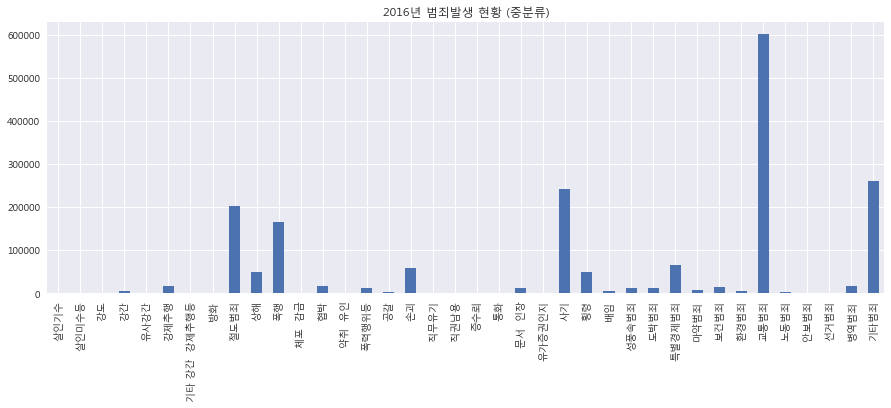

In [19]:
plt.rcParams["figure.figsize"] = [15, 5]
df_index.plot(kind='bar', title='2016년 범죄발생 현황 (중분류)');

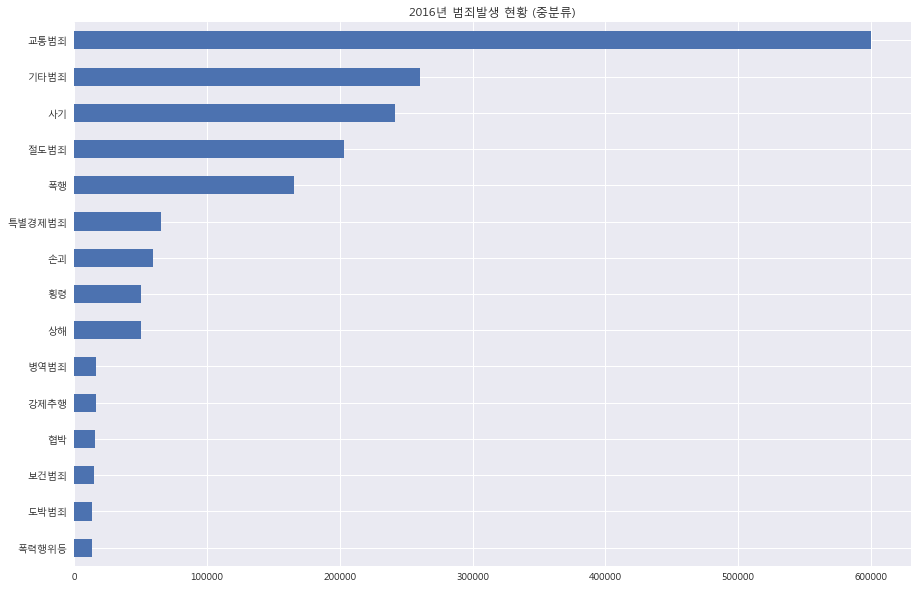

In [20]:
plt.rcParams["figure.figsize"] = [15,10]
# df_index.plot(kind='barh', title='2016년 범죄발생 현황 (중분류)');
df_index.sort_values(ascending=True).tail(15).plot(kind='barh', title='2016년 범죄발생 현황 (중분류)');

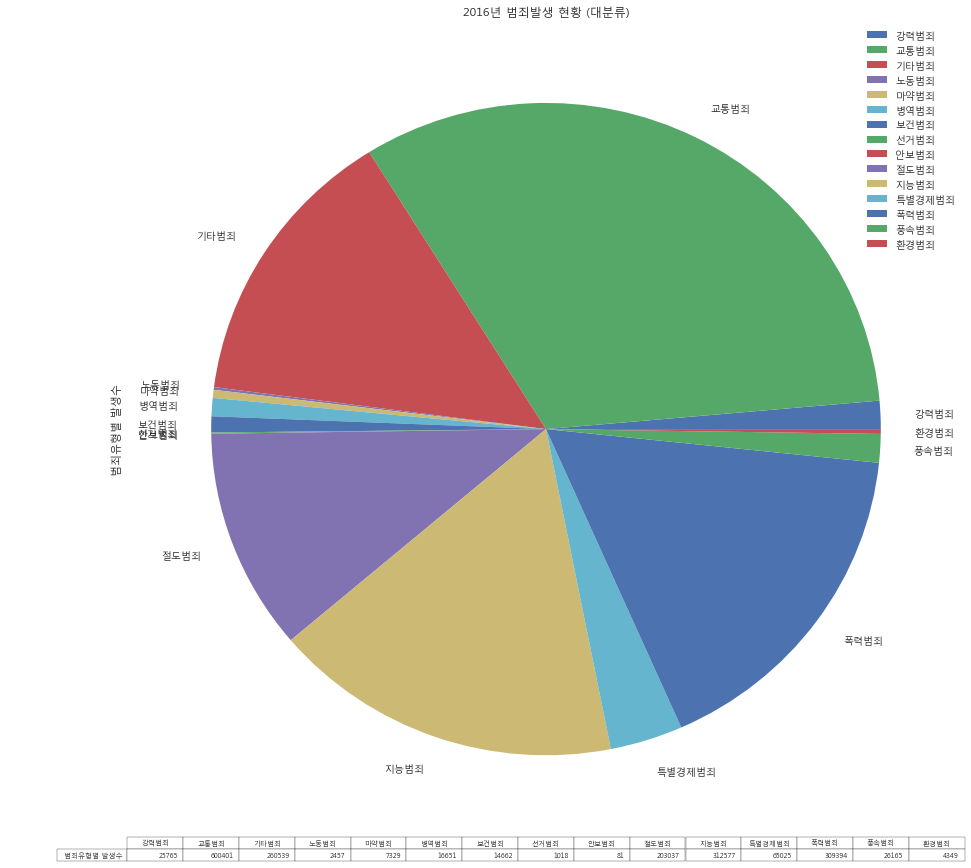

In [21]:
plt.rcParams["figure.figsize"] = [15,15]
crime_stat.plot(kind='pie', title='2016년 범죄발생 현황 (대분류)', label='범죄유형별 발생수', legend=True, table=True);

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>